In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Big Moon Data

In [2]:
D = np.load("big_moonfinal.npz")["volts"]
T = np.load("big_moonfinal.npz")["time"]

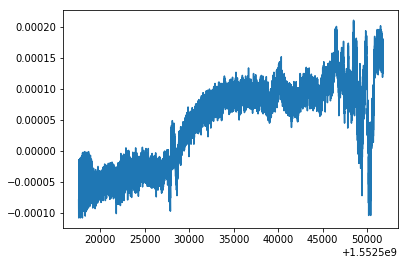

In [3]:
plt.plot(T,D)

In [4]:
V_spec = np.fft.fft(D)
P_moon = abs(V_spec)**2
sampling_freq = 1 #Hz
f = np.fft.fftfreq(len(D),1/sampling_freq)


<IPython.core.display.Javascript object>


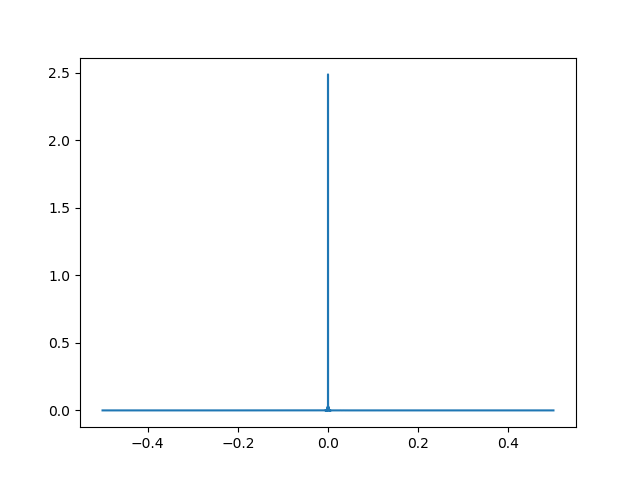

In [32]:
#%matplotlib notebook
plt.plot(np.fft.fftshift(f),np.fft.fftshift(P_moon))

In [6]:
V_filtered = V_spec
for i in range (0,len(P_moon)):
    if (f[i]>-0.04) and (f[i]<-0.02):
        V_filtered[i] = V_spec[i]
    if (f[i]<0.04) and (f[i]>0.02):
        V_filtered[i] = V_spec[i]
    else:
        V_filtered[i] = 0

In [7]:
plt.plot(np.fft.fftshift(f),np.fft.fftshift(P_filtered))

NameError: name 'P_filtered' is not defined

<IPython.core.display.Javascript object>


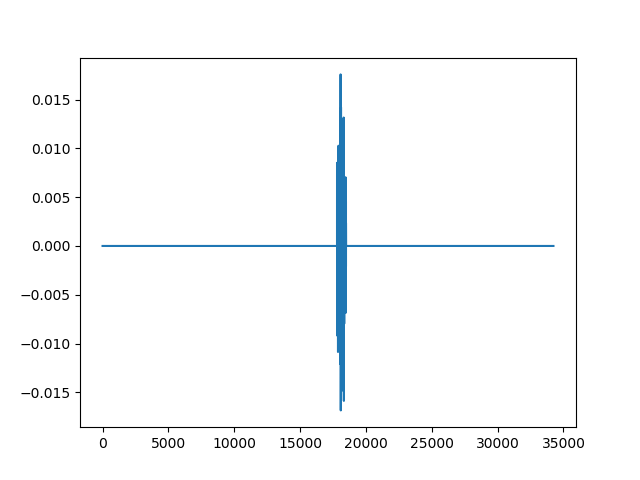

/Users/costassoler/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [33]:
plt.plot(np.fft.fftshift(V_spec))

In [9]:
v_filtered = np.fft.ifft(V_spec)

In [43]:
T[0]+9200

1552526757.014736

<IPython.core.display.Javascript object>


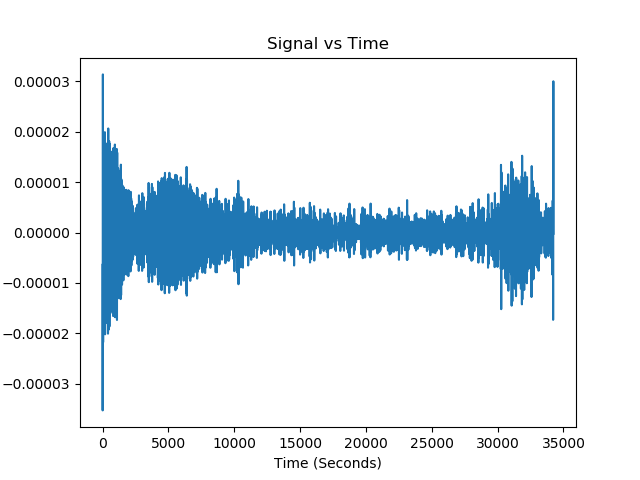

/Users/costassoler/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [40]:
plt.plot(T-T[0],v_filtered)
plt.title('Signal vs Time')
plt.xlabel('Time (Seconds)')
plt.ylabel('Signal')

plt.savefig('SigVsTime.pdf')
plt.show()

In [11]:
(3*10**8)/(10.7*10**9)

0.028037383177570093

# Calculating Range of Fringe Frequencies

Text(0.5,0,'Hour Angle')

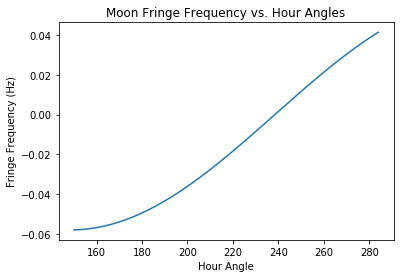

In [12]:
RaStart = (15-5)*180//12
RaEnd = (24-5)*180//12
HA = np.arange(RaStart,RaEnd)
B = 20
lam = (3*10**8)/(10.7*10**9)
delta = 18*(np.pi/180) #degrees
L = 37.87*(np.pi/180)
hs = HA*(np.pi/180) #noon
ff = (B/lam)*np.cos(delta)*np.cos(hs) - (B/lam)*np.sin(L)*np.cos(delta)*np.sin(hs)
F = ff*2*np.pi/(24*3600)
plt.plot(HA,F)
plt.title('Moon Fringe Frequency vs. Hour Angles')
plt.ylabel('Fringe Frequency (Hz)')
plt.xlabel('Hour Angle')





## All our fringes lie within this range

# 10 Calculating width of moon

In [13]:
y1 = 2400 #times at which the "bessel function" goes to zero
y2 = 9200
Y = [y1,y2]

hi = 15*3600



h1 = hi+y1
h2 = hi+y2

xdata = [h1,h2]
ydata = [y1,y2]

def func(x, R):
    B = 20
    lam = (3*10**8)/(10.7*10**9)
    
    return (B/lam)*np.cos(x)/R


In [14]:
import scipy.optimize as optimization
c = optimization.curve_fit(func, xdata, ydata)[0]
c

array([2770013.10631212])

# Bessel Function (compare moon roots to J1/x roots)

In [66]:
j_roots = [3.83,7.83]#[10.17,13.32]

 #these are the hour angles of the moon at the null locations in radians
def u(ha):
    B = 20
    lam = (3*10**8)/(10.7*10**9)
    u = np.cos(ha)*B/lam
    return u

In [67]:
RA = 4.83
LST1 = 3.36
LST2 = 5.61
HA1=LST1-RA
HA2 = LST2-RA
HA = [HA1*np.pi/12,HA2*np.pi/12]

In [68]:
U_vals = [u(HA[0]),u(HA[1])]
print(U_vals)

[661.1577048899528, 698.5122715768595]


In [69]:
LS = np.polyfit(U_vals,j_roots,1)

In [70]:
R = LS[0]/(2*np.pi)
print(R*180/np.pi)

0.9764703313779062


# 8.4 Least Squares Fitting the Fringe to the baselines

In [18]:
B = 20
l = (3*10**8)/(10.7*10**9)

1700*l/B

2.3831775700934577

In [30]:
1/1700

0.000588235294117647

# Long Sun Data:

In [75]:
VBS = np.load('Sun2019final.npz')['volts']
TBS = np.load('Sun2019final.npz')['time']

<IPython.core.display.Javascript object>


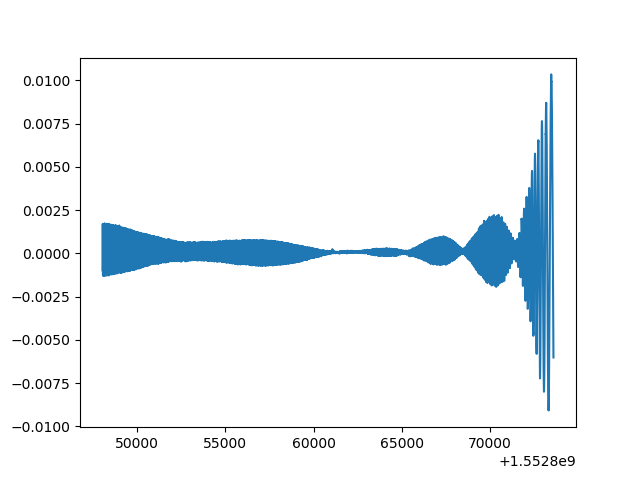

In [76]:
plt.plot(TBS,VBS)
plt.show()

In [ ]:
V_spec = np.fft.fft(VBS)
P_moon = abs()**2
sampling_freq = 1 #Hz
f = np.fft.fftfreq(len(D),1/sampling_freq)
